In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv('risk_factors_cervical_cancer_cleaned.csv')

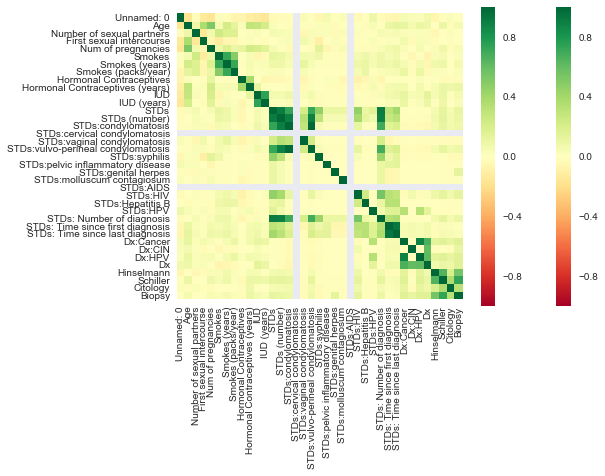

In [8]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

Taking all the columns for building a model

In [71]:
# KNeighborsClassifier

# Create arrays for the features and the response variable
#y = df['Biopsy'].values
#X = df.drop('Biopsy', axis=1).values
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

# Instantiate a GridSearch:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 3}
0.9533437013996889


In [73]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

# Fit the classifier to the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[196   5]
 [  8   6]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       201
          1       0.55      0.43      0.48        14

avg / total       0.93      0.94      0.94       215



Taking only highly correlated columns for building a model

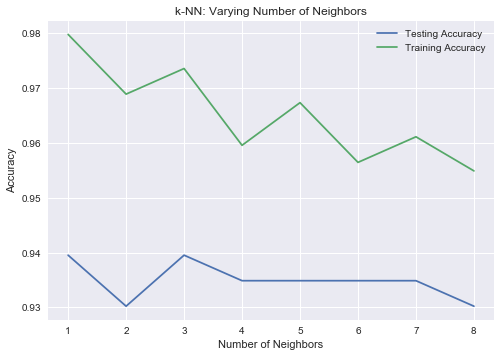

[[196   5]
 [  8   6]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       201
          1       0.55      0.43      0.48        14

avg / total       0.93      0.94      0.94       215



In [74]:
# KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [77]:
# DecisionTreeClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

param_grid = {"max_depth": [3, None],
              "max_features": np.arange(1, 7),
              "min_samples_leaf": np.arange(1, 7),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid, cv=5)

tree_cv.fit(X_train, y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)


{'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6}
0.9642301710730948


In [78]:
# Instantiate a DecisionTreeClassifier: clf
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=4, min_samples_leaf=6)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[194   7]
 [  4  10]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       201
          1       0.59      0.71      0.65        14

avg / total       0.95      0.95      0.95       215



In [80]:
# RandomForestClassifier
#import scipy
#from scipy.stats import expon 
# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

#params = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
#  'kernel': 'rbf', 'class_weight':['balanced', None]}
# Instantiate a RandomForestClassifier: clf
#clf = GridSearchCV(RandomForestClassifier, params)
clf = RandomForestClassifier()
# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[194   7]
 [  5   9]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       201
          1       0.56      0.64      0.60        14

avg / total       0.95      0.94      0.95       215



In [86]:
# SVM

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instantiate a RandomForestClassifier: clf
clf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[157   4]
 [  2   9]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       161
          1       0.69      0.82      0.75        11

avg / total       0.97      0.97      0.97       172

